In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
zoo_data=pd.read_csv('Zoo.csv')
zoo_data.head(50)

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
6,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1,1
7,carp,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,4
8,catfish,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
9,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0,1


In [3]:
zoo_data.shape

(101, 18)

In [4]:
zoo_data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [5]:
zoo_data.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
zoo_data['animal name']=label.fit_transform(zoo_data['animal name'])
zoo_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,96,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,97,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,98,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [7]:
zoo_data.dtypes

animal name    int32
hair           int64
feathers       int64
eggs           int64
milk           int64
airborne       int64
aquatic        int64
predator       int64
toothed        int64
backbone       int64
breathes       int64
venomous       int64
fins           int64
legs           int64
tail           int64
domestic       int64
catsize        int64
type           int64
dtype: object

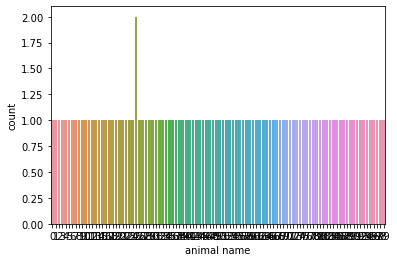

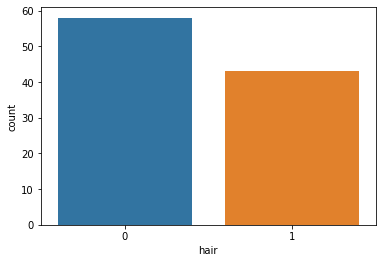

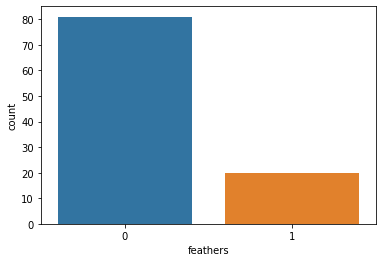

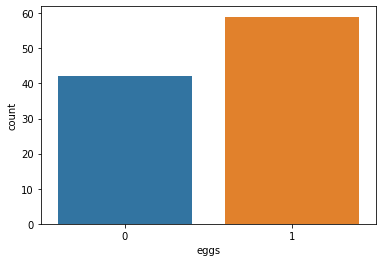

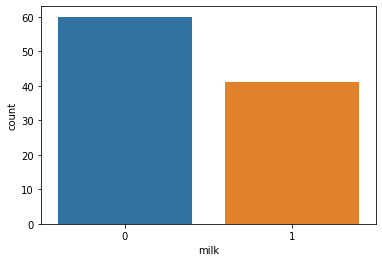

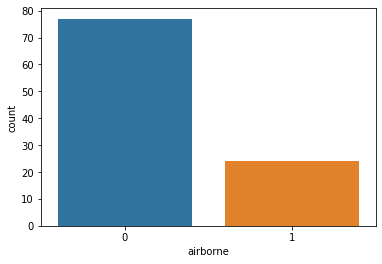

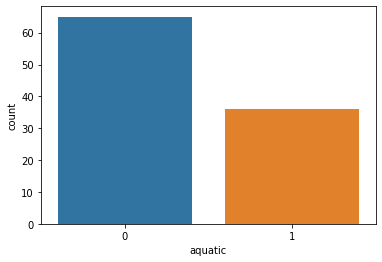

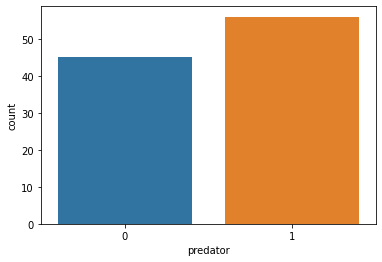

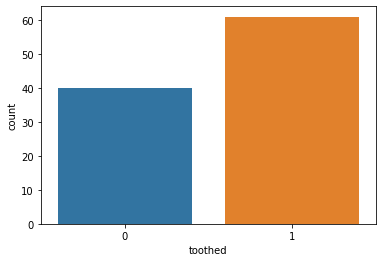

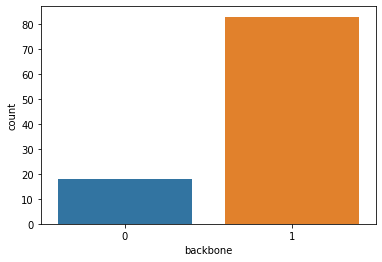

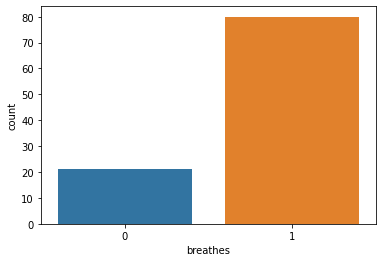

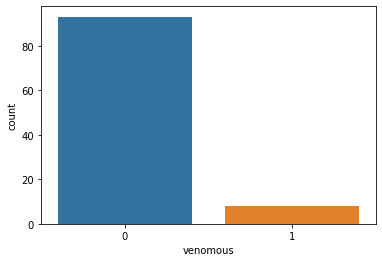

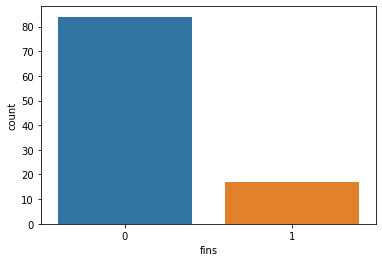

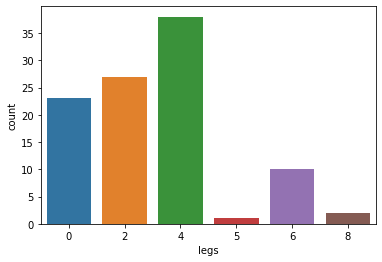

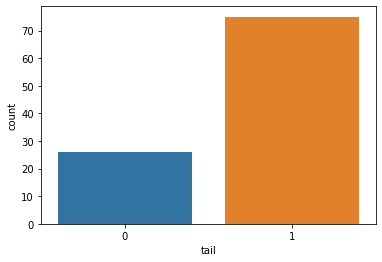

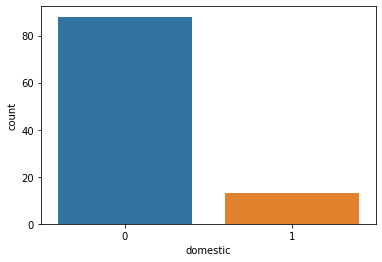

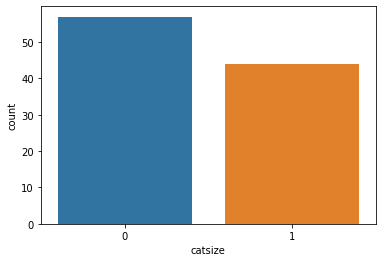

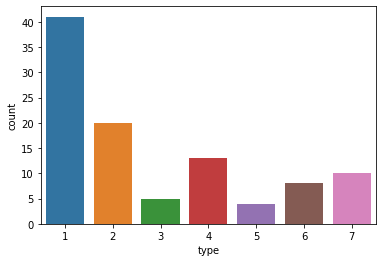

In [8]:
for i in zoo_data.columns:
    sns.countplot(zoo_data[i])
    plt.show()

<AxesSubplot:xlabel='type', ylabel='count'>

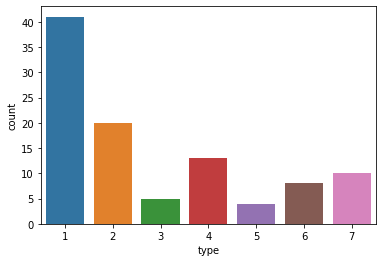

In [9]:
sns.countplot(zoo_data['type'])

In [10]:
x=zoo_data.drop('type',axis=1)
y=zoo_data[['type']]

In [11]:
x.shape,y.shape

((101, 17), (101, 1))

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [13]:
x_train.shape,y_train.shape

((80, 17), (80, 1))

In [14]:
x_test.shape,y_test.shape

((21, 17), (21, 1))

### for k=3

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

y_pred=knn_model.predict(x_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

0.6625

### for k=5

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

y_pred=knn_model.predict(x_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

0.5875

### for k=7

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=7)
knn_model.fit(x_train,y_train)

y_pred=knn_model.predict(x_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

0.5

In [18]:
#Let's Standardize the input features
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
x_scaled=std_scaler.fit_transform(x)
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,-1.708840,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,-1.674148,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-1.639456,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,-1.604764,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,-1.570072,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.586903,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,-0.415948,0.588784,-0.384353,1.138180
97,1.621595,1.161395,-0.496904,0.843721,-0.826640,1.791182,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,3.409545,-0.449868,1.561027,-1.698416,-0.384353,-0.878595
98,1.656287,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
99,1.690979,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,-0.744208,-1.115547,-1.234909,-2.14735,0.512348,-0.293294,-0.449868,-1.404435,-1.698416,-0.384353,-0.878595


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

y_pred=knn_model.predict(x_train)

from sklearn.metrics import accuracy_score #Accuracy rate after standardizing the data for k=3
accuracy_score(y_train,y_pred)

0.9875

In [30]:
#Find Optimal number of clusters using cross validation
from sklearn.model_selection import cross_val_score

container_cv_score=[]
for i in range(1,102,2):
    knn_model=KNeighborsClassifier(n_neighbors=i)
    cv_scores=cross_val_score(estimator=knn_model,X=x_scaled,y=y,cv=5)
    container_cv_score.append(cv_scores.mean())
container_cv_score

[0.9800000000000001,
 0.96,
 0.9200000000000002,
 0.9099999999999999,
 0.8904761904761905,
 0.8704761904761906,
 0.8509523809523809,
 0.8414285714285714,
 0.8514285714285714,
 0.8414285714285714,
 0.8419047619047617,
 0.8219047619047618,
 0.8023809523809525,
 0.7828571428571429,
 0.7628571428571428,
 0.7628571428571428,
 0.7528571428571429,
 0.7233333333333334,
 0.6933333333333334,
 0.6538095238095238,
 0.5938095238095238,
 0.5638095238095238,
 0.5347619047619048,
 0.49523809523809526,
 0.4652380952380953,
 0.4552380952380952,
 0.44523809523809527,
 0.44523809523809527,
 0.4257142857142857,
 0.4057142857142857,
 0.4057142857142857,
 0.4057142857142857,
 0.4057142857142857,
 0.4057142857142857,
 0.4057142857142857,
 0.4057142857142857,
 0.4057142857142857,
 0.4057142857142857,
 0.4057142857142857,
 0.4057142857142857,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

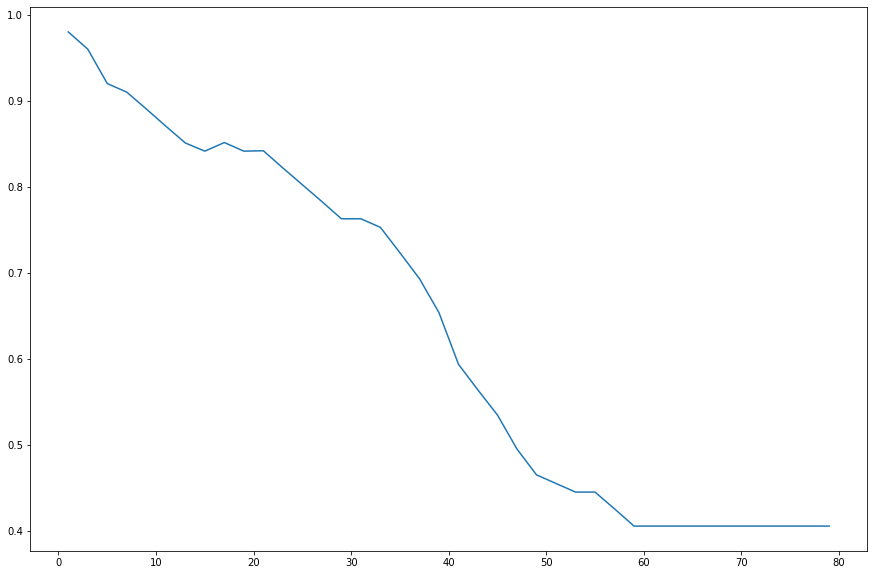

In [32]:
plt.figure(figsize=(15,10))
plt.plot(range(1,102,2),container_cv_score)
plt.show()

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

y_pred=knn_model.predict(x_train)

from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

0.9875

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00        12
           5       1.00      1.00      1.00         4
           6       0.88      1.00      0.93         7
           7       1.00      0.89      0.94         9

    accuracy                           0.99        80
   macro avg       0.98      0.98      0.98        80
weighted avg       0.99      0.99      0.99        80

